In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers

## Import du Dataset

In [365]:
data = pd.read_csv('data.csv')

In [366]:
data.head()

,num_ligne,ID_Client,Nom,Score_Credit,Pays,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [367]:
data.Exited.dtype

dtype('int64')

## Encodage de la variable Sex

In [368]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data.Sex = encoder.fit_transform(data.Sex)

## Encodage de la variable Pays

In [369]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pays = np.array(data.Pays)
pays = pays.reshape(pays.shape[0], 1)
print(pays.shape)

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
pays_enc = enc.fit_transform(pays)

col = np.unique(data.Pays)
pays_enc = pd.DataFrame(data=pays_enc, columns=col, dtype=np.int64)

(10000, 1)


## Visualisation des corrélations

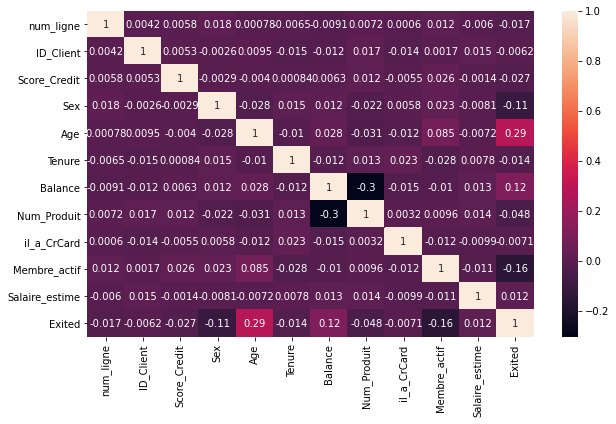

In [370]:
import seaborn as sns
plt.figure(figsize=(10,6))
ax = sns.heatmap(data.corr(), annot=True)

## Selection des variables

In [371]:
X = data.iloc[:, :13].copy()
y = data.Exited.copy()


X = X.drop(['num_ligne', 'ID_Client', 'Nom', 'Pays'], axis=1)
X = pd.concat([X, pays_enc], axis=1)
col = X.columns
X.head()

,Score_Credit,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


## Standardisation des variables

In [372]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

## Séparation jeu de données entrainement / test

In [373]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2000)

In [374]:
donnees_train = X_train
donnees_test = X_test
index_train = [i for i in range(len(donnees_train))]
index_test = [i for i in range(len(donnees_test))]

X_train = pd.DataFrame(data=donnees_train,index=index_train, columns=[col])
X_test = pd.DataFrame(data=donnees_test,index=index_test, columns=[col])

X_train.head()

,Score_Credit,Sex,Age,Tenure,Balance,Num_Produit,il_a_CrCard,Membre_actif,Salaire_estime,France,Germany,Spain
0,-1.257431,-1.095988,-0.755372,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-1.274144,0.997204,-0.578736,-0.573809
1,-1.247084,-1.095988,-1.613554,0.687130,-1.225848,0.807737,0.646092,-1.030670,0.070951,-1.002804,-0.578736,1.742740
2,1.887989,0.912419,-0.946079,-1.387538,0.320163,0.807737,-1.547768,0.970243,-0.888649,-1.002804,1.727904,-0.573809
3,0.160077,-1.095988,-0.660018,1.724464,0.577788,0.807737,0.646092,0.970243,-1.143148,0.997204,-0.578736,-0.573809
4,-0.046858,-1.095988,-0.850726,1.724464,0.385657,0.807737,-1.547768,-1.030670,0.641542,-1.002804,1.727904,-0.573809


## Création du réseau de neuronne et entrainement

In [375]:
my_init = initializers.glorot_uniform(seed=1)
model = keras.Sequential()
model.add(layers.Dense(12, input_dim=12, activation='relu', kernel_initializer=my_init))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [376]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 12)                156       
_________________________________________________________________
dense_135 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 9         
Total params: 269
Trainable params: 269
Non-trainable params: 0
_________________________________________________________________


In [377]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=5)

Epoch 1/50
1600/1600 [==============================] - 5s 2ms/step - loss: 0.5501 - accuracy: 0.7323 - val_loss: 0.4365 - val_accuracy: 0.8130
Epoch 2/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4276 - accuracy: 0.8189 - val_loss: 0.4253 - val_accuracy: 0.8260
Epoch 3/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.4096 - accuracy: 0.8347 - val_loss: 0.4134 - val_accuracy: 0.8295
Epoch 4/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3872 - accuracy: 0.8438 - val_loss: 0.3888 - val_accuracy: 0.8405
Epoch 5/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3806 - accuracy: 0.8483 - val_loss: 0.3731 - val_accuracy: 0.8510
Epoch 6/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3475 - accuracy: 0.8603 - val_loss: 0.3562 - val_accuracy: 0.8585
Epoch 7/50
1600/1600 [==============================] - 2s 1ms/step - loss: 0.3437 - accuracy: 0.8604 - val_loss: 0.3523 - val_accuracy:

## Evaluation du modèle

In [378]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2, batch_size=5)

print("Précision : ", test_acc)

400/400 - 0s - loss: 0.3569 - accuracy: 0.8665
Précision :  0.8665000200271606


In [379]:
#predictions = model.predict_classes(X_test)

predictions = (model.predict(X_test) > 0.5).astype("int32")

In [380]:
np.unique(predictions)

array([0, 1])

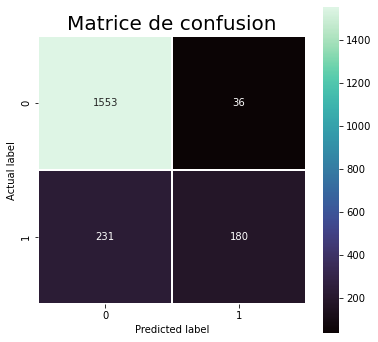

In [381]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'mako')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()